# ASIGNACION 10 - ANALITICA DESCRIPTIVA
Estudiante: Nicole Moreta |
Matricula: 2020-9400

1. Cargando las librerias a utilizar

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_iris   
# sklearn.datasetsincludes common example datasets
# A function to load in the iris dataset
iris_obj = load_iris()   
# Dataset preview
iris_obj.data              # Names of the columns
iris_obj.feature_names     # Target variable
iris_obj.target            # Target names
iris_obj.target_names      # name of target variable

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
iris1 = DataFrame(iris_obj.data, columns=iris_obj.feature_names,index=pd.Index([i for i in range(iris_obj.data.shape[0])])).join(DataFrame(iris_obj.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris_obj.target.shape[0])])))
iris1 # prints iris data
iris1.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
iris1 # prints labeled data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2- Importando el data set de iris para regresión logística

In [40]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

C:\Users\ncmor\AppData\Local\Temp/ipykernel_14928/456635705.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


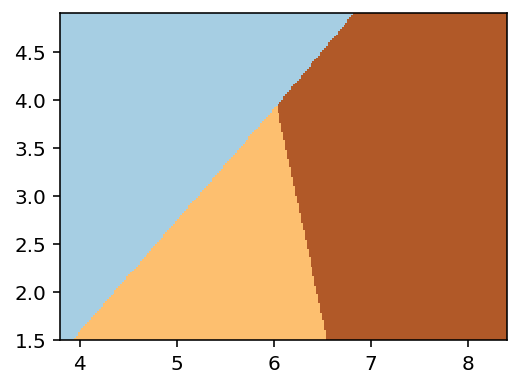

In [10]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

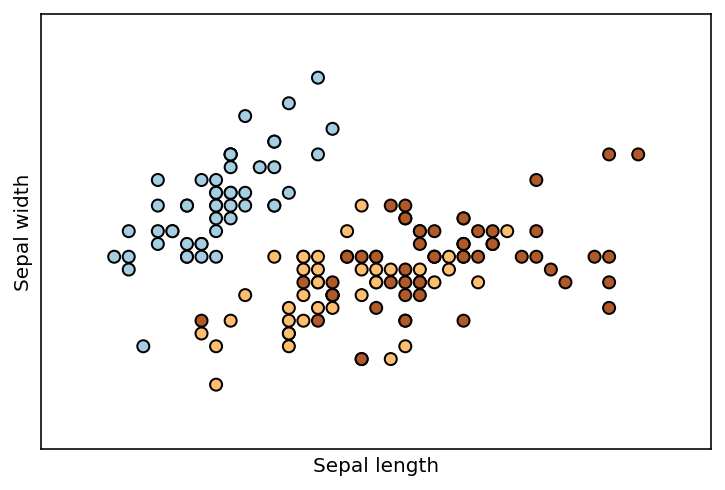

In [13]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# RED NEURONAL - IRIS

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

In [16]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [17]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[ 0.26961422 -1.10748958  0.99916719  0.23403047]
 [ 2.41066836  1.74034077  1.44991931  1.02511938]
 [ 1.69698365 -0.39553199  1.39357529  0.76142308]]


In [18]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

C:\Users\ncmor\anaconda3\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.975
0.9666666666666667


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[39,  0,  0],
       [ 0, 38,  1],
       [ 0,  2, 40]], dtype=int64)

In [21]:
confusion_matrix(predictions_test, test_labels)

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# OTRO EJEMPLO DE RED NEURONAL

In [42]:
import numpy, random, os
lr = 1 #learning rate
bias = 1 #value of bias
weights = [random.random(),random.random(),random.random()] #weights generated in a list (3 weights in total for 2 neurons and the bias)

In [43]:
def Perceptron(input1, input2, output) :
   outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
   if outputP > 0 : #activation function (here Heaviside)
      outputP = 1
   else :
      outputP = 0
   error = output - outputP
   weights[0] += error * input1 * lr
   weights[1] += error * input2 * lr
   weights[2] += error * bias * lr

In [44]:
def Perceptron(input1, input2, output) :
   outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
   if outputP > 0 : #activation function (here Heaviside)
      outputP = 1
   else :
      outputP = 0
   error = output - outputP
   weights[0] += error * input1 * lr
   weights[1] += error * input2 * lr
   weights[2] += error * bias * lr

In [45]:
for i in range(50) :
   Perceptron(1,1,1) #True or true
   Perceptron(1,0,1) #True or false
   Perceptron(0,1,1) #False or true
   Perceptron(0,0,0) #False or false

In [46]:
x = int(input())
y = int(input())
outputP = x*weights[0] + y*weights[1] + bias*weights[2]
if outputP > 0 : #activation function
   outputP = 1
else :
   outputP = 0
print(x, "or", y, "is : ", outputP)

1
1
1 or 1 is :  1
